# Predicting Medical Health Insurance Charges

### Many factors that affect how much you pay for health insurance are not within your control. 
### Nonetheless, it's good to have an understanding of what they are. 
### Here are some factors that affect how much health insurance premiums cost
#### age: age of primary beneficiary
#### sex: insurance contractor gender, female, male
#### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
#### objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
##### children: Number of children covered by health insurance / Number of dependents
##### smoker: Smoking
##### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

### Importing Libraries

In [1]:
# The following code is for the KNN regression from Scratch
# Created by - Muhammad Ahmed Shuja

# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.random as nr
import matplotlib.pyplot as plt

### Importing Data set

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data types

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Summary

In [355]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Finding Null Values

In [356]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Classifying and counting total no. of 'sex' , 'region ' ,'smoker'

In [530]:
print(df['sex'].value_counts())
print()
print(df['region'].value_counts())
print()
print(df['smoker'].value_counts())

male      676
female    662
Name: sex, dtype: int64

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64


# Exploratory Data analysis

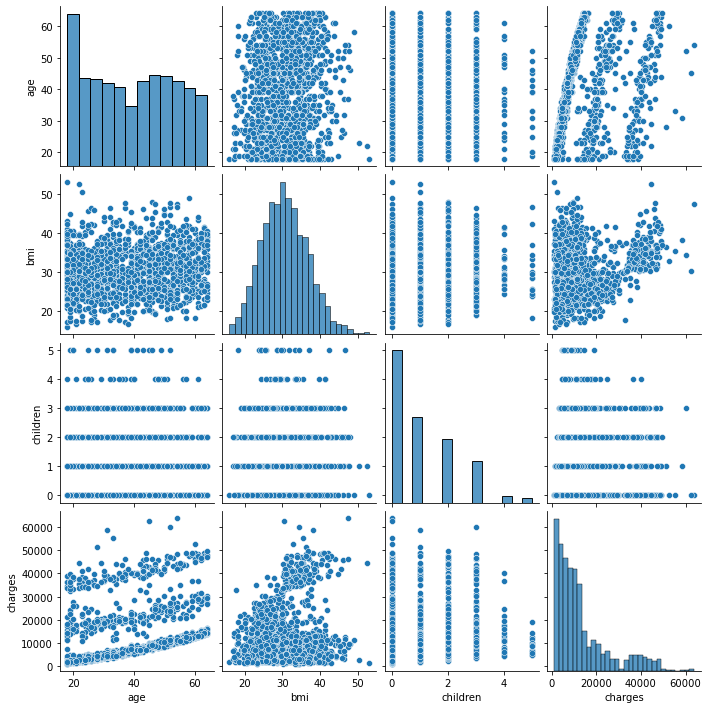

In [531]:
sns.pairplot(df)

### Healthy People

In [809]:
df_healthy=df[(df['bmi']>18.5) & (df['bmi']<24.9)]
a=df_healthy.count()
print('healthy_people:')
print(a)
df_healthy_region=df_healthy.groupby('region')
df_healthy_region.describe().round(2)

healthy_people:
age         221
sex         221
bmi         221
children    221
smoker      221
region      221
charges     221
dtype: int64


age                                                bmi         \
          count   mean    std   min   25%   50%    75%   max count   mean   
region                                                                      
northeast  72.0  37.32  12.59  18.0  28.0  36.5  45.25  63.0  72.0  22.46   
northwest  62.0  37.29  14.08  19.0  25.0  36.0  49.00  64.0  62.0  22.69   
southeast  40.0  38.98  14.22  18.0  27.0  40.5  51.00  64.0  40.0  23.02   
southwest  47.0  33.34  14.10  19.0  20.5  28.0  47.00  62.0  47.0  22.36   

           ... children      charges                                       \
           ...      75%  max   count      mean      std      min      25%   
region     ...                                                              
northeast  ...      2.0  3.0    72.0  11151.78  7396.01  1702.46  5155.28   
northwest  ...      2.0  5.0    62.0  10032.51  7221.67  1625.43  4057.70   
southeast  ...      2.0  5.0    40.0  13286.81  8470.65  1121.87  6196.08   
southwest  ...      1.0  5.0    47.0   7299.29  6086.85  1241.56  2226.38   

                                         
                50%       75%       max  
region                                   
northeast   8658.20  15548.15  35069.37  
northwest   7977.39  14116.15  30166.62  
southeast  11858.92  19935.61  27117.99  
southwest   4931.65  10875.64  26236.58  

[4 rows x 32 columns]

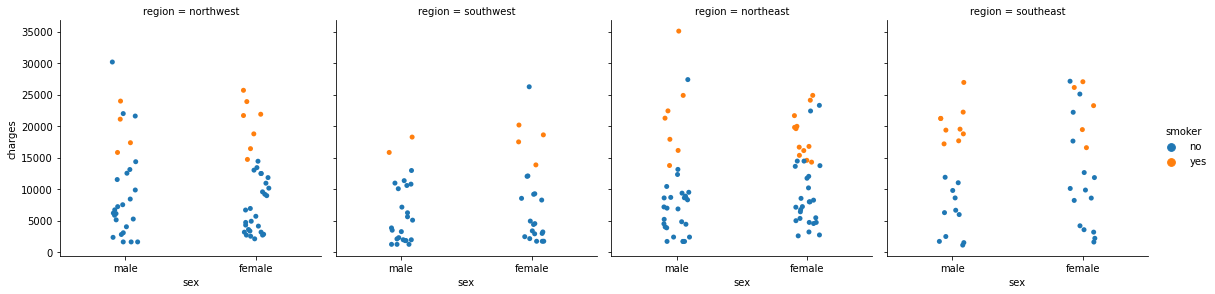

In [810]:
sns.catplot(x="sex", y="charges", hue="smoker",
                col="region", height=4, data=df_healthy)

<AxesSubplot:xlabel='charges'>

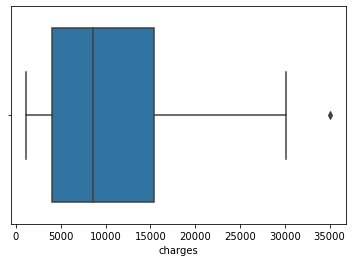

In [811]:
sns.boxplot(x=df_healthy["charges"])

#### Removing outlier charges from healthy people

In [813]:
df1=df_healthy[df_healthy['charges']<33000]

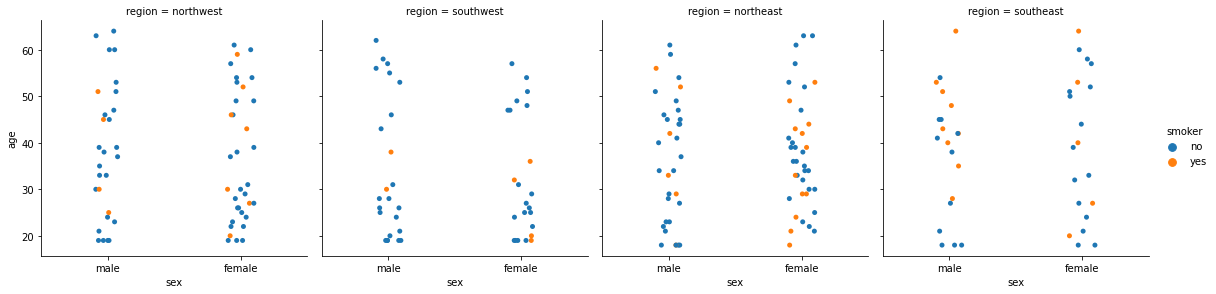

In [829]:
sns.catplot(x="sex", y="age", hue="smoker",
                col="region", height=4, data=df1)

### Underweight People

In [815]:
df_underweight=df[(df['bmi']<18.5)]
a=df_underweight.count()
print('underweight_people:')
print(a)
df_underweigh_region=df_underweight.groupby('region')
df_underweigh_region.describe().round(2)


underweight_people:
age         20
sex         20
bmi         20
children    20
smoker      20
region      20
charges     20
dtype: int64


age                                                 bmi         \
          count   mean    std   min    25%   50%    75%   max count   mean   
region                                                                       
northeast  10.0  33.00  15.09  18.0  22.25  27.5  37.75  60.0  10.0  17.33   
northwest   7.0  34.00  13.09  19.0  24.50  32.0  43.00  52.0   7.0  17.79   
southwest   3.0  26.33  11.02  19.0  20.00  21.0  30.00  39.0   3.0  17.83   

           ... children      charges                                       \
           ...      75%  max   count     mean       std      min      25%   
region     ...                                                              
northeast  ...      2.0  2.0    10.0  8914.42   5052.35  1694.80  4459.61   
northwest  ...      1.0  2.0     7.0  9223.35  10897.74  1621.34  2728.07   
southwest  ...      3.0  5.0     3.0  7778.77   9747.45  1727.78  2156.53   

                                        
               50%       75%       max  
region                                  
northeast  9206.43  13110.58  15006.58  
northwest  5116.50   9817.65  32734.19  
southwest  2585.27  10804.26  19023.26  

[3 rows x 32 columns]

<AxesSubplot:xlabel='charges'>

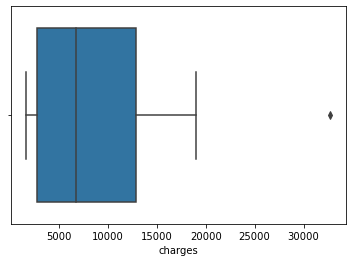

In [816]:
sns.boxplot(x=df_underweight["charges"])


<AxesSubplot:xlabel='bmi'>

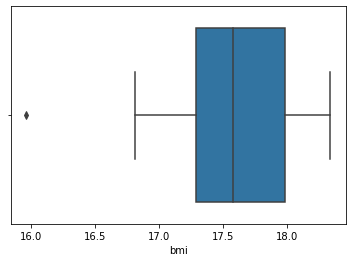

In [817]:
sns.boxplot(x=df_underweight["bmi"])


#### Removing outlier charges and bmi from Underweight people

In [818]:
df2=df_underweight[df_underweight['charges']<20000]

In [819]:
df2=df2[df2['bmi']>16.5]

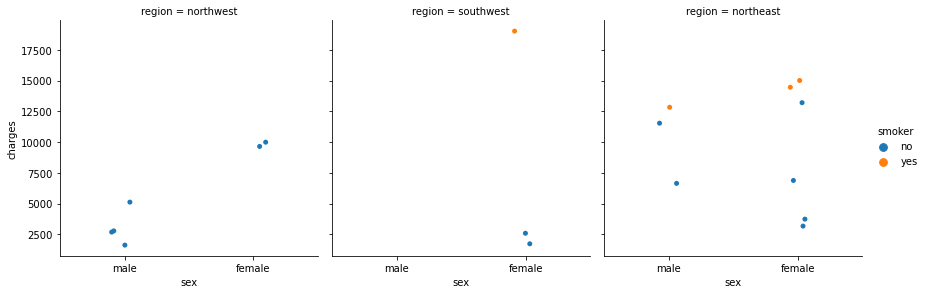

In [827]:
sns.catplot(x="sex", y="charges", hue="smoker",
                col="region", height=4, data=df2)

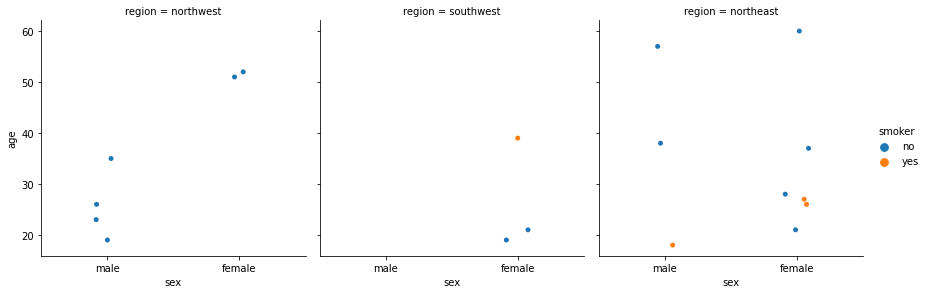

In [828]:
sns.catplot(x="sex", y="age", hue="smoker",
                col="region", height=4, data=df2)

### Overweight People

In [821]:
df_overweight=df[(df['bmi']>24.9)]
b=df_overweight.count()
print('overweight_people:')
print(b)
df_overweight_region=df_overweight.groupby('region')
df_overweight_region.describe().round(2)

overweight_people:
age         1096
sex         1096
bmi         1096
children    1096
smoker      1096
region      1096
charges     1096
dtype: int64


age                                                 bmi         \
           count   mean    std   min   25%   50%    75%   max  count   mean   
region                                                                        
northeast  242.0  40.11  14.37  18.0  27.0  41.0  52.75  64.0  242.0  31.66   
northwest  256.0  39.80  14.05  19.0  27.0  40.0  52.00  64.0  256.0  31.09   
southeast  324.0  38.94  14.18  18.0  26.0  39.0  51.00  64.0  324.0  34.63   
southwest  274.0  40.67  13.67  19.0  29.0  41.0  52.00  64.0  274.0  32.19   

           ... children      charges                                        \
           ...      75%  max   count      mean       std      min      25%   
region     ...                                                               
northeast  ...      2.0  5.0   242.0  14262.79  12232.72  1708.00  5278.17   
northwest  ...      2.0  4.0   256.0  13082.55  11763.97  1632.04  5001.84   
southeast  ...      2.0  5.0   324.0  14914.25  14505.46  1131.51  4411.30   
southwest  ...      2.0  5.0   274.0  13290.46  12077.34  1252.41  5377.16   

                                         
                50%       75%       max  
region                                   
northeast  10389.00  18839.72  58571.07  
northwest   9211.82  15821.87  60021.40  
southeast   8961.15  19526.29  63770.43  
southwest   9403.13  14178.11  52590.83  

[4 rows x 32 columns]

<AxesSubplot:xlabel='charges'>

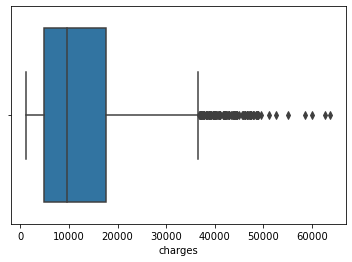

In [373]:
sns.boxplot(x=df_overweight["charges"])

<AxesSubplot:xlabel='bmi'>

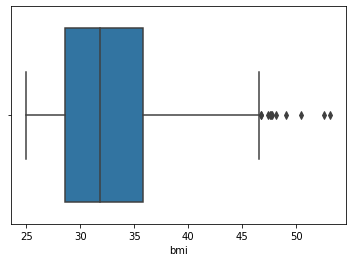

In [807]:
sns.boxplot(x=df_overweight["bmi"])

#### Removing outlier charges and bmi from Overweight people

In [822]:
df3=df_overweight[df_overweight['charges']<50000]
df3=df3[df3['bmi']<47]

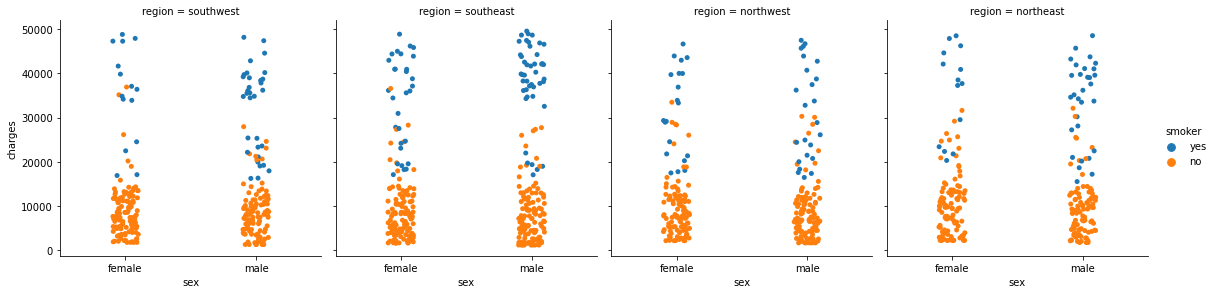

In [825]:
sns.catplot(x="sex", y="charges", hue="smoker",
                col="region", height=4, data=df3)

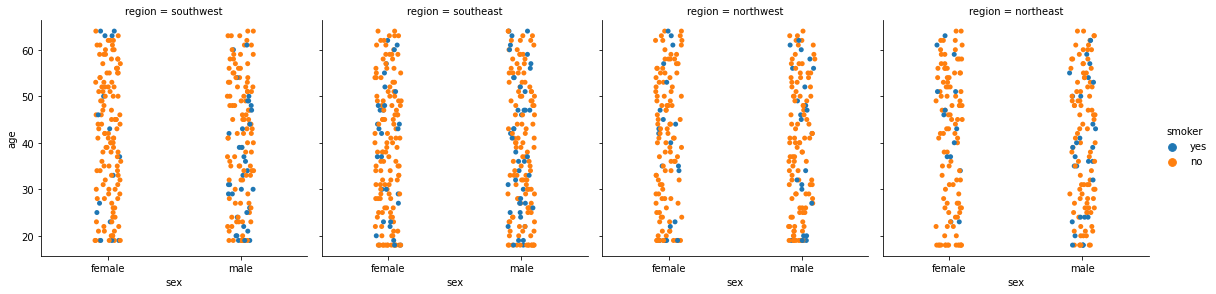

In [826]:
sns.catplot(x="sex", y="age", hue="smoker",
                col="region", height=4, data=df3)

In [831]:
df_final=pd.concat([df1,df2,df3])
df_final.head()
df_final['region'].unique()

array(['northwest', 'southwest', 'northeast', 'southeast'], dtype=object)

# KNN Model

## KNN Model wihtout any Modification

#### changing categorial data into numeric data type

In [3]:
# dummy variables
data= pd.get_dummies(df, drop_first=True)

In [4]:
data.columns.values

array(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [5]:
cols=['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest',
       'charges']

In [6]:
dumies_data=data[cols]
dumies_data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


In [7]:
inputs=dumies_data.drop(['charges'],axis=1)
target=dumies_data['charges']

#Standarization
import sklearn.preprocessing as sp   
scalar=sp.StandardScaler()
scalar.fit(inputs)
scalar_input=scalar.transform(inputs)

# Split dataset into train/test datasets
import sklearn.model_selection as sm 
x_train,x_test,y_train,y_test=sm.train_test_split(scalar_input,target,test_size=0.2, random_state=365)

#Using KNN regression model 
import sklearn.neighbors as sn
KNN=sn.KNeighborsRegressor(n_neighbors=20)  # because this is a regression problem,p=2 euclidean_distance
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [8]:
# predicting values by using test dataset
pred=KNN.predict(x_test)

In [9]:
import sklearn
R=sklearn.metrics.r2_score(y_test,pred)  # R-Square score for model Evaluation
R

0.7386971571242855

In [10]:
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1-(1-R)*(n-1)/(n-p-1)
adjusted_r2   # Adjusted R-Square Score

0.7306260268424102

### Feature Selection

In [11]:
# Feature selection
import sklearn.feature_selection as sf
# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics
p_values = sf.f_regression(x_train,y_train)[1].round(4)
p_values


array([0.    , 0.    , 0.0192, 0.041 , 0.    , 0.2159, 0.017 , 0.1252])

## KNN Model After Modification

In [832]:
df_1=pd.DataFrame()
df_1['smoker'] = df_final['smoker'].map({'yes': 1, 'no': 0})
df_2=pd.DataFrame()
df_2['sex'] = df_final['sex'].map({'male': 1, 'female': 0})
df_3=pd.DataFrame()
df_3['regions'] = df_final['region'].map({'northwest': 1,'northeast':2,'southwest': 3,'southeast': 4})



### Non-parametric Rank Correlation

In [833]:
a1=df_final['age'].values
a2=df_final['charges'].values
a3=df_final['children'].values
a4=df_1['smoker'].values
a5=df_2['sex'].values
a6=df_3['regions'].values

#### kendall's Rank Correlation between Charges and age

In [834]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# calculate kendall's correlation
coef, p = kendalltau(a2,a1)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.480
Samples are correlated (reject H0) p=0.000


#### kendall's Rank Correlation between Charges and sex

In [835]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# calculate kendall's correlation
coef, p = kendalltau(a2,a5)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.009
Samples are uncorrelated (fail to reject H0) p=0.681


#### kendall's Rank Correlation between Charges and children

In [836]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# calculate kendall's correlation
coef, p = kendalltau(a2,a3)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.105
Samples are correlated (reject H0) p=0.000


#### kendall's Rank Correlation between Charges and regions

In [837]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# calculate kendall's correlation
coef, p = kendalltau(a2,a6)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.006
Samples are uncorrelated (fail to reject H0) p=0.778


#### kendall's Rank Correlation between Charges and smoker

In [838]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# calculate kendall's correlation
coef, p = kendalltau(a2,a4)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.535
Samples are correlated (reject H0) p=0.000


In [839]:
# creating Dummies variable
data11= pd.get_dummies(df_final, drop_first=True)

In [840]:
# finding column name
data11.columns.values

array(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [841]:
cols=['age', 'bmi', 'children', 'smoker_yes',
       'charges']

In [842]:
dumies_data=data11[cols]
dumies_data.head()

,age,bmi,children,smoker_yes,charges
3,33,22.705,0,0,21984.47061
15,19,24.600,1,0,1837.23700
17,23,23.845,0,0,2395.17155
26,63,23.085,0,0,14451.83515
35,19,20.425,0,0,1625.43375


In [843]:
inputs=dumies_data.drop(['charges'],axis=1)
target=dumies_data['charges']

import sklearn.preprocessing as sp
scalar=sp.StandardScaler()
scalar.fit(inputs)
scalar_input=scalar.transform(inputs)

import sklearn.model_selection as sm 
x_train,x_test,y_train,y_test=sm.train_test_split(scalar_input,target,test_size=0.2, random_state=365)


### Feature Selection

In [844]:
import sklearn.feature_selection as sf
# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics
p_values = sf.f_regression(x_train,y_train)[1].round(4)
p_values


array([0.    , 0.    , 0.0221, 0.    ])

In [848]:

import sklearn.neighbors as sn
KNN=sn.KNeighborsRegressor(n_neighbors=19,p=2,metric='minkowski')  # because this is a regression problem,p=2 euclidean_distance
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=19)

#### Model Evaluation in terms of R-Square score 

In [849]:
pred=KNN.predict(x_test)

import sklearn
R=sklearn.metrics.r2_score(y_test,pred)*100
R

87.3407530023336

### Choosing the best value for 'K'

In [847]:
from sklearn import metrics
rmse_val = []
for K in range(1,30):
    
    model = sn.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
print()
print("Manimum error:-",min(rmse_val),"at K =",rmse_val.index(min(rmse_val))+1)

RMSE value for k=  1 is: 5616.591827049613
RMSE value for k=  2 is: 4999.611586488948
RMSE value for k=  3 is: 4446.930130563845
RMSE value for k=  4 is: 4392.721152037118
RMSE value for k=  5 is: 4188.293374664431
RMSE value for k=  6 is: 4167.217364229372
RMSE value for k=  7 is: 4135.33368402416
RMSE value for k=  8 is: 4097.98607585123
RMSE value for k=  9 is: 4052.8247571626916
RMSE value for k=  10 is: 4045.5796383407946
RMSE value for k=  11 is: 4022.106988091355
RMSE value for k=  12 is: 3971.193184450469
RMSE value for k=  13 is: 3929.086149547051
RMSE value for k=  14 is: 3895.287695754845
RMSE value for k=  15 is: 3837.0873889336276
RMSE value for k=  16 is: 3839.2382583433623
RMSE value for k=  17 is: 3844.5926459579214
RMSE value for k=  18 is: 3835.337719054959
RMSE value for k=  19 is: 3831.0497805248783
RMSE value for k=  20 is: 3841.06484804553
RMSE value for k=  21 is: 3839.5557579956967
RMSE value for k=  22 is: 3836.4851763205857
RMSE value for k=  23 is: 3873.33066

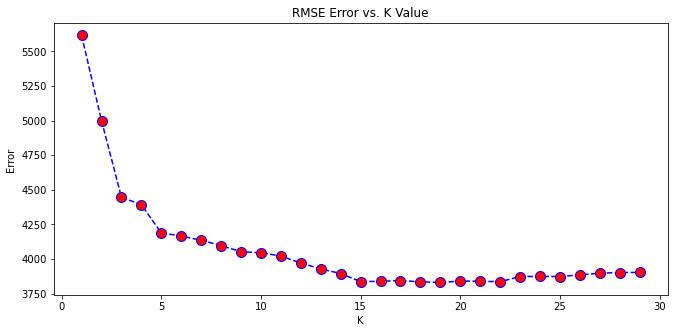

In [850]:
# using graph representation to show the best value of "K"
plt.figure(figsize=(11,5))
plt.plot(range(1,30),rmse_val,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error ')
plt.show()

###  KNN Model after modification is 87.34 % accurate. First I've achieved 73% accuracy from the model but when I eliminate the outliers, corrupt data ,missing data and choose correct value of 'K' then I've achived a greater accuracy of the model that is 87.34%  